<a href="https://colab.research.google.com/github/LukasSchmauch/bin_packing_problem/blob/main/06_Ergebnisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafiken für Präsentation/ Ausarbeitung

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def get_num_lb(df, typ,max_time):
  df_typ = df[df['Typ']==typ]
  df_typ_sec = df_typ[df_typ['elapsed_time']<max_time] 
  return df_typ_sec.groupby(['Typ','Anzahl_Items','Bin_Kapazitaet']).sum().Hit_LB.values

def get_wc_deviation(df, typ, max_time):
  df_typ = df[df['Typ']==typ]
  df_typ_sec = df_typ[df_typ['elapsed_time']<max_time]
  df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
  return df_by_instance.groupby('Anzahl_Items').max().Bins_beyond_LB.values

def get_mean_deviation(df, typ, max_time):
  df_typ = df[df['Typ']==typ]
  df_typ_sec = df_typ[df_typ['elapsed_time']<max_time]
  df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
  return df_by_instance.groupby('Anzahl_Items').mean().Bins_beyond_LB.values

def extract_yvalues_pertimestep(df, num_items, type, timesteps):
  df_itemsize = df[df['Anzahl_Items']==num_items]
  df_type = df_itemsize[df_itemsize['Typ']==type]
  mean_lbs_pertimestep = []
  for xtimestep in timesteps: 
    mean_lbs_pertimestep.append(df_type[df_type['elapsed_time']<xtimestep].groupby('Instanzindex').min().Bins_beyond_LB.values.mean())
  return mean_lbs_pertimestep

def create_barplot_uniform_hitlb(df):
  fig = plt.figure(figsize=(12,8))
  ax = fig.add_subplot(111)
  timesteps = [1.01,20.01,100.01]
  N = len(get_num_lb(df, 'uniform', timesteps[0]))
  ind = np.arange(N)  # the x locations for the groups
  width = 0.27       # the width of the bars
  yvals = get_num_lb(df, 'uniform', timesteps[0])
  rects1 = ax.bar(ind, yvals, width, color='darkblue')
  zvals = get_num_lb(df, 'uniform', timesteps[1])
  rects2 = ax.bar(ind+width, zvals, width, color='blue')
  kvals = get_num_lb(df, 'uniform', timesteps[2])
  rects3 = ax.bar(ind+width*2, kvals, width, color='lightblue')
  ax.set_ylabel('Scores')
  ax.set_xticks(ind+width)
  ax.set_xticklabels(('(U,120,150)', '(U,250,150)', '(U,500,150)','(U,1000,150)'))
  ax.hlines(20,-0.2,3.7, label='# Instanzen', color='darkred')
  ax.legend( (rects1[0], rects2[0], rects3[0]), ('1 sec', '20 sec', '100 sec'))
  plt.title('Anzahl getroffener LBs (bei vorgegebene Rechenzeit)', fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('Instanzgruppen', fontsize=20)
  plt.ylabel('Anzahl getroffener LBs', fontsize=20)

def create_barplot_uniform_hard_hitlb(df_unif, df_hard):
  fig = plt.figure(figsize=(12,8))
  ax = fig.add_subplot(111)
  timesteps = [1.01,20.01,100.01]
  N = len(get_num_lb(df_unif, 'uniform', timesteps[0])) + 1
  ind = np.arange(N)  # the x locations for the groups
  width = 0.27       # the width of the bars
  y_vals = np.append(get_num_lb(df_unif, 'uniform', timesteps[0]),get_num_lb(df_hard, 'hard', timesteps[0]))
  rects1 = ax.bar(ind, yvals, width, color='darkblue')
  zvals = get_num_lb(df_unif, 'uniform', timesteps[1])
  zvals.append(get_num_lb(df_hard, 'hard', timesteps[1]))
  rects2 = ax.bar(ind+width, zvals, width, color='blue')
  kvals = get_num_lb(df_unif, 'uniform', timesteps[2])
  kvals.append(get_num_lb(df_hard, 'hard', timesteps[2]))
  rects3 = ax.bar(ind+width*2, kvals, width, color='lightblue')
  ax.set_ylabel('Scores')
  ax.set_xticks(ind+width)
  ax.set_xticklabels(('(U,120,150)', '(U,250,150)', '(U,500,150)','(U,1000,150)','(T,1000,150)'))
  ax.hlines(20,-0.2,3.7, label='# Instanzen', color='darkred')
  ax.legend( (rects1[0], rects2[0], rects3[0]), ('1 sec', '20 sec', '100 sec'))
  plt.title('Anzahl getroffener LBs (bei vorgegebene Rechenzeit)', fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('Instanzgruppen', fontsize=20)
  plt.ylabel('Anzahl getroffener LBs', fontsize=20)

def create_barplot_triplet_hitlb(df):
  fig = plt.figure(figsize=(12,8))
  ax = fig.add_subplot(111)
  timesteps = [1.01,20.01,100.01]
  N = len(get_num_lb(df, 'triplet', timesteps[0]))
  ind = np.arange(N)  # the x locations for the groups
  width = 0.27       # the width of the bars
  yvals = get_num_lb(df, 'triplet', timesteps[0])
  rects1 = ax.bar(ind, yvals, width, color='darkblue')
  zvals = get_num_lb(df, 'triplet', timesteps[1])
  rects2 = ax.bar(ind+width, zvals, width, color='blue')
  kvals = get_num_lb(df, 'triplet', timesteps[2])
  rects3 = ax.bar(ind+width*2, kvals, width, color='lightblue')
  ax.set_ylabel('Scores')
  ax.set_xticks(ind+width)
  #ax.set_xticklabels(('(T,120,150)', '(T,250,150)', '(T,500,150)','(T,1000,150)'))
  ax.hlines(20,-0.2,3.7, label='# Instanzen', color='darkred')
  ax.legend( (rects1[0], rects2[0], rects3[0]), ('1 sec', '20 sec', '100 sec'))
  plt.title('Anzahl gefundener LBs (bei vorgegebene Rechenzeit)', fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('Instanzgruppen', fontsize=20)
  plt.ylabel('Anzahl getroffener LBs', fontsize=20)

def get_rel_abweichung(df, typ,max_time):
  df_typ = df[df['Typ']==typ]
  df_typ_sec = df_typ[df_typ['elapsed_time']<max_time] 
  df_grouped_by_instance = df_typ_sec.groupby('Instanzindex').min()
  df_grouped_by_instance['rel_Abweichung'] = 100*(df_grouped_by_instance['Bins_beyond_LB'] / df_grouped_by_instance['LB'])
  return df_grouped_by_instance

# Permutation Random (Original Verfahren)

## Übersicht

### FFD

#### Uniform

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/FFD/results_zeitmessung_FFD.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
120,150.0,49.05,49.75,0.70
250,150.0,101.55,103.10,1.55
500,150.0,201.20,203.90,2.70
1000,150.0,400.55,405.40,4.85


#### Hard

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/FFD/results_zeitmessung_FFD.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='hard']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
200,100000.0,55.5,59.6,4.1


#### Triplet

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/FFD/results_zeitmessung_FFD.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
60,1000.0,20.0,23.20,3.20
120,1000.0,40.0,45.80,5.80
249,1000.0,83.0,95.00,12.00
501,1000.0,167.0,190.05,23.05


### Standardverfahren

#### Uniform 100 sec

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)


,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
120,150.0,49.05,49.10,0.05
250,150.0,101.55,101.80,0.25
500,150.0,201.20,201.35,0.15
1000,150.0,400.55,400.80,0.25


In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).max()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Bins_beyond_LB','HC','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,Iteration,elapsed_time
Anzahl_Items,,,,
120,150.0,49.05,311.55,6.235078
250,150.0,101.55,730.10,27.189304
500,150.0,201.20,279.00,25.732400
1000,150.0,400.55,146.40,42.906083


#### Hard 100 sec

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_hard_StandardSEED123_150sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='hard']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','Hit_LB','elapsed_time'],axis=1)


,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
200,100000.0,55.5,56.2,0.7


In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_hard_StandardSEED123_150sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='hard']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).max()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Bins_beyond_LB','HC','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,Iteration,elapsed_time
Anzahl_Items,,,,
200,100000.0,55.5,2213.4,70.335039


#### Triplet 100 sec --> für 501er Ergebnis Zeit auf 200 setzen

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_trip_StandardSEED123_200sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','Hit_LB','elapsed_time'],axis=1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
60,1000.0,20.0,21.0,1.0
120,1000.0,40.0,41.0,1.0
249,1000.0,83.0,84.0,1.0
501,1000.0,167.0,168.1,1.1


In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_trip_StandardSEED123_200sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).max()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Bins_beyond_LB','HC','Hit_LB'], axis = 1)


,Bin_Kapazitaet,LB,Iteration,elapsed_time
Anzahl_Items,,,,
60,1000.0,20.0,2443.95,99.976423
120,1000.0,40.0,1795.40,99.974851
249,1000.0,83.0,1581.30,99.971366
501,1000.0,167.0,919.15,99.944219


### nur Largest First

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Largest_First/results_zeitmessung_unif_LargestFirstSEED123_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)


,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
120,150.0,49.05,49.05,0.00
250,150.0,101.55,101.70,0.15
500,150.0,201.20,201.20,0.00
1000,150.0,400.55,400.65,0.10


In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Largest_First/results_zeitmessung_triplet_LargestFirstSEED123_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet0']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)


,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
60,1000.0,20.0,20.75,0.75
120,1000.0,40.0,41.00,1.00
249,1000.0,83.0,84.00,1.00
501,1000.0,167.0,168.00,1.00


### ohne 2:1 Move

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/results_zeitmessung_unif_StandardOhne2%3A1SEED123_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
120,150.0,49.05,49.05,0.00
250,150.0,101.55,101.70,0.15
500,150.0,201.20,201.30,0.10
1000,150.0,400.55,400.75,0.20


In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_trip_StandardOhne2%3A1SEED123_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
60,1000.0,20.0,20.7,0.7
120,1000.0,40.0,41.0,1.0
249,1000.0,83.0,84.0,1.0
501,1000.0,167.0,168.0,1.0


### Durchschnittliche Itemgröße (Shuffle)

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_u_singleaverageseed_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
120,150.0,49.05,49.05,0.00
250,150.0,101.55,101.65,0.10
500,150.0,201.20,201.20,0.00
1000,150.0,400.55,400.70,0.15


In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_t_shuffleAverage_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
60,1000.0,20.0,20.7,0.7
120,1000.0,40.0,41.0,1.0
249,1000.0,83.0,84.0,1.0
501,1000.0,167.0,168.0,1.0


### Durchschnittliche Itemgröße (Shuffle 5:5:5:3)

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_unif_AVGINSHUFFLESEED123_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
120,150.0,49.05,49.05,0.00
250,150.0,101.55,101.80,0.25
500,150.0,201.20,201.35,0.15
1000,150.0,400.55,400.75,0.20


In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_triplet_avginshuffleseed_250sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','elapsed_time','Hit_LB'], axis = 1)

,Bin_Kapazitaet,LB,HC,Bins_beyond_LB
Anzahl_Items,,,,
60,1000.0,20.0,21.0,1.0
120,1000.0,40.0,41.0,1.0
249,1000.0,83.0,84.0,1.0
501,1000.0,167.0,168.1,1.1


# Optimalitätsanalyse

## Uniform und Hard

Text(0, 0.5, 'Anzahl getroffener LBs')

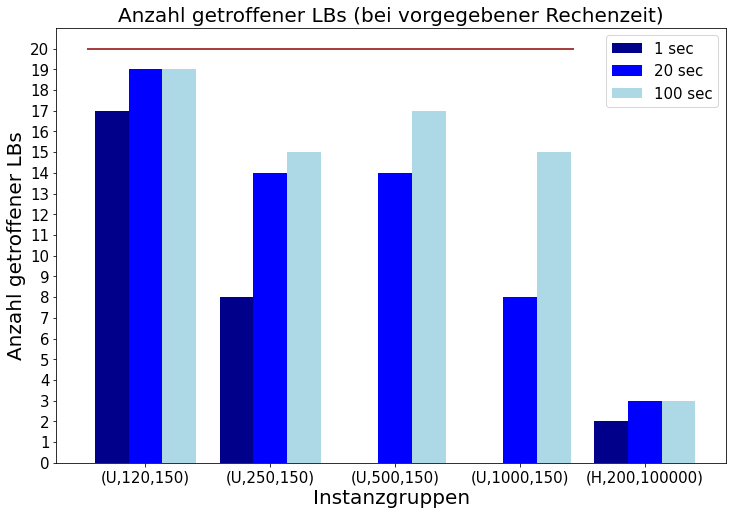

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df_unif = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_hard_StandardSEED123_150sec.csv'
df_hard = pd.read_csv(url)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
timesteps = [1.01,20.01,100.01]
N = len(get_num_lb(df_unif, 'uniform', timesteps[0]))+1
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
yvals = get_num_lb(df_unif, 'uniform', timesteps[0])
yvals = np.append(yvals, get_num_lb(df_hard,'hard',timesteps[0]))
rects1 = ax.bar(ind, yvals, width, color='darkblue')
zvals = get_num_lb(df_unif, 'uniform', timesteps[1])
zvals = np.append(zvals, get_num_lb(df_hard,'hard',timesteps[1]))
rects2 = ax.bar(ind+width, zvals, width, color='blue')
kvals = get_num_lb(df_unif, 'uniform', timesteps[2])
kvals = np.append(kvals, get_num_lb(df_hard,'hard',timesteps[2]))
rects3 = ax.bar(ind+width*2, kvals, width, color='lightblue')
ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(('(U,120,150)', '(U,250,150)', '(U,500,150)','(U,1000,150)','(H,200,100000)'))
ax.hlines(20,-0.2,3.7, label='# Instanzen', color='darkred')
#ax.hlines(10,3.7,5, label='# Instanzen', color='darkred')
ax.legend( (rects1[0], rects2[0], rects3[0]), ('1 sec', '20 sec', '100 sec'), prop={'size': 15})
plt.title('Anzahl getroffener LBs (bei vorgegebener Rechenzeit)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,21,1),fontsize=15)
plt.xlabel('Instanzgruppen', fontsize=20)
plt.ylabel('Anzahl getroffener LBs', fontsize=20)


# Worst Case Analyse

## Uniform und Hard

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df_typ = pd.read_csv(url)
df_typ_sec = df_typ[df_typ['elapsed_time']<1.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).max()
df_by_instance.groupby('Anzahl_Items').max().drop(['Hit_LB','HC'],axis = 1)

,Typ,Bin_Kapazitaet,LB,Bins_beyond_LB,Iteration,elapsed_time
Anzahl_Items,,,,,,
120,uniform,150,52,1,60,1.008978
250,uniform,150,105,2,37,1.005700
500,uniform,150,207,3,18,1.009837
1000,uniform,150,411,6,3,0.988759


Text(0, 0.5, 'Worst Case Abweichung von LB')

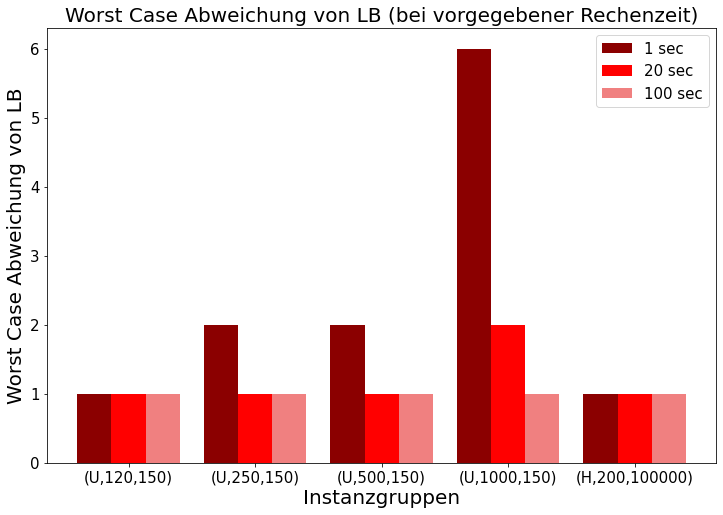

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df_unif = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_hard_StandardSEED123_150sec.csv'
df_hard = pd.read_csv(url)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
timesteps = [1.01,20.01,100.01]
N = len(get_wc_deviation(df_unif, 'uniform', timesteps[0]))+1
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
yvals = get_wc_deviation(df_unif, 'uniform', timesteps[0])
yvals = np.append(yvals, get_wc_deviation(df_hard,'hard',timesteps[0]))
rects1 = ax.bar(ind, yvals, width, color='darkred')
zvals = get_wc_deviation(df_unif, 'uniform', timesteps[1])
zvals = np.append(zvals, get_wc_deviation(df_hard,'hard',timesteps[1]))
rects2 = ax.bar(ind+width, zvals, width, color='red')
kvals = get_wc_deviation(df_unif, 'uniform', timesteps[2])
kvals = np.append(kvals, get_wc_deviation(df_hard,'hard',timesteps[2]))
rects3 = ax.bar(ind+width*2, kvals, width, color='lightcoral')
ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(('(U,120,150)', '(U,250,150)', '(U,500,150)','(U,1000,150)','(H,200,100000)'))
#ax.hlines(20,-0.2,3.7, label='# Instanzen', color='darkred')
#ax.hlines(10,3.7,5, label='# Instanzen', color='darkred')
ax.legend( (rects1[0], rects2[0], rects3[0]), ('1 sec', '20 sec', '100 sec'), prop={'size': 15})
plt.title('Worst Case Abweichung von LB (bei vorgegebener Rechenzeit)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Instanzgruppen', fontsize=20)
plt.ylabel('Worst Case Abweichung von LB', fontsize=20)


## Triplet

Text(0, 0.5, 'Worst Case Abweichung von LB')

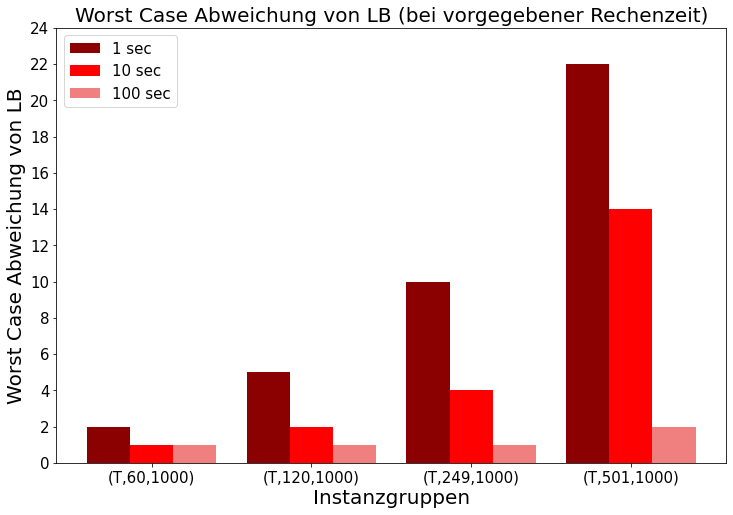

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_trip_StandardSEED123_200sec.csv'
df = pd.read_csv(url)


timesteps = [1.01,10.01,100.01]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
N = len(get_wc_deviation(df, 'triplet', timesteps[0]))
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

yvals = get_wc_deviation(df, 'triplet', timesteps[0])
rects1 = ax.bar(ind, yvals, width, color='darkred')
zvals = get_wc_deviation(df, 'triplet', timesteps[1])
rects2 = ax.bar(ind+width, zvals, width, color='red')
kvals = get_wc_deviation(df, 'triplet', timesteps[2])
rects3 = ax.bar(ind+width*2, kvals, width, color='lightcoral')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(('(T,60,1000)', '(T,120,1000)', '(T,249,1000)','(T,501,1000)'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('1 sec', '10 sec', '100 sec'), prop={'size': 15})
plt.title('Worst Case Abweichung von LB (bei vorgegebener Rechenzeit)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,25,2),fontsize=15)
plt.xlabel('Instanzgruppen', fontsize=20)
plt.ylabel('Worst Case Abweichung von LB', fontsize=20)


# Zusammenhang Lösungsgüte und Rechenzeit

### Uniform und Hard

[]

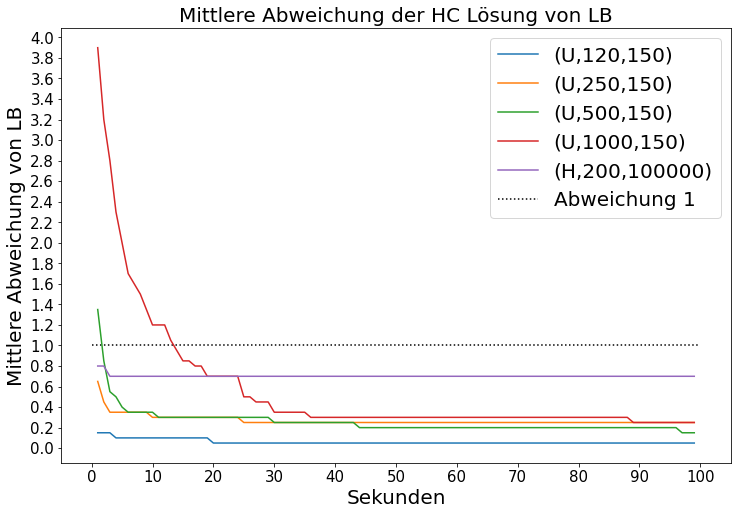

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df_unif = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_hard_StandardSEED123_150sec.csv'
df_hard = pd.read_csv(url)

timesteps = list(np.arange(1, 100, 1))
yvalues = []
itemsizes = [120,250,500,1000]

plt.figure(figsize=(12,8))
plt.title('Mittlere Abweichung der HC Lösung von LB', fontsize = 20)
plt.xlabel('Sekunden', fontsize = 20)
plt.hlines(1.0,0,100, label= 'Abweichung 1',colors='black', linestyles='dotted')
plt.yticks(np.arange(0,5,0.2),fontsize=15)
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.ylabel('Mittlere Abweichung von LB', fontsize = 20)
for itemsize in itemsizes:
  plt.plot(timesteps, extract_yvalues_pertimestep(df_unif, itemsize, 'uniform', timesteps))
plt.plot(timesteps, extract_yvalues_pertimestep(df_hard, 200, 'hard', timesteps))
plt.legend(['(U,120,150)', '(U,250,150)', '(U,500,150)','(U,1000,150)','(H,200,100000)','Abweichung 1'],prop={'size': 20})
plt.plot()
#from google.colab import files
#plt.savefig("abc.svg")
#files.download("abc.svg")

## Triplet

[]

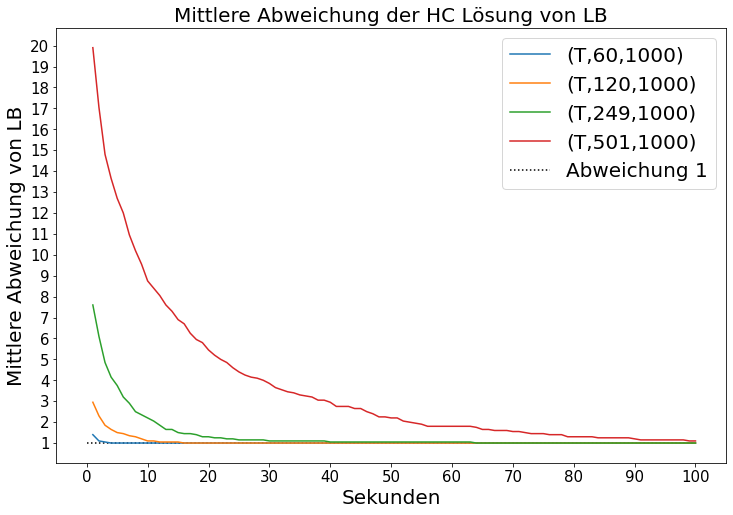

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_trip_StandardSEED123_200sec.csv'
df = pd.read_csv(url)


timesteps = range(1, 101)
yvalues = []
itemsizes = [60,120,249,501]

plt.figure(figsize=(12,8))
plt.title('Mittlere Abweichung der HC Lösung von LB', fontsize = 20)
plt.xlabel('Sekunden', fontsize = 20)
plt.yticks(np.arange(0,50,1),fontsize=15)
plt.xticks(np.arange(0,110,10),fontsize=15)
plt.hlines(1.0,0,100, colors='black', label='Abweichung 1', linestyles='dotted')
plt.ylabel('Mittlere Abweichung von LB', fontsize = 20)
for itemsize in itemsizes:
  plt.plot(timesteps, extract_yvalues_pertimestep(df, itemsize, 'triplet', timesteps))
plt.legend(['(T,60,1000)', '(T,120,1000)', '(T,249,1000)','(T,501,1000)','Abweichung 1'],prop={'size': 20})
plt.plot()

# Verfahrensmodifikationen

## Shuffle

### Verteilungsfunktion Uniform

Text(0.5, 1.0, 'Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)')

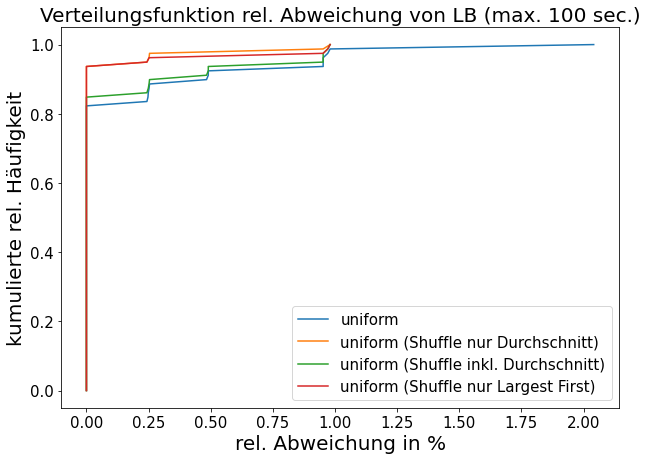

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df_1 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_u_singleaverageseed_100sec.csv'
df_2 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_unif_AVGINSHUFFLESEED123_100sec.csv'
df_3 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Largest_First/results_zeitmessung_unif_LargestFirstSEED123_100sec.csv'
df_4 = pd.read_csv(url)
time = 100.01
df_1 = get_rel_abweichung(df_1,'uniform', time)
df_2 = get_rel_abweichung(df_2,'uniform', time)
df_3 = get_rel_abweichung(df_3,'uniform', time)
df_4 = get_rel_abweichung(df_4,'uniform', time)
dfs = [df_1,df_2,df_3, df_4]
labels = ['uniform', 'uniform (Shuffle nur Durchschnitt)', 'uniform (Shuffle inkl. Durchschnitt)','uniform (Shuffle nur Largest First)']


plt.figure(figsize=(10,7))
for i,df in enumerate(dfs):
  data = df['rel_Abweichung'].values
  data_sorted = np.sort(data)
  p = 1. * np.arange(len(data)) / (len(data) - 1)
  plt.plot(data_sorted, p, label=labels[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right",prop={'size': 15})
plt.xlabel('rel. Abweichung in %',fontsize=20)
plt.ylabel('kumulierte rel. Häufigkeit',fontsize=20)
#plt.title('Verteilungsfunktion rel. Abweichung von LB (max. ' + str(time) + ') sec', fontsize=20)
plt.title('Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)', fontsize=20)

### Verteilungsfunktion Triplet

Text(0.5, 1.0, 'Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)')

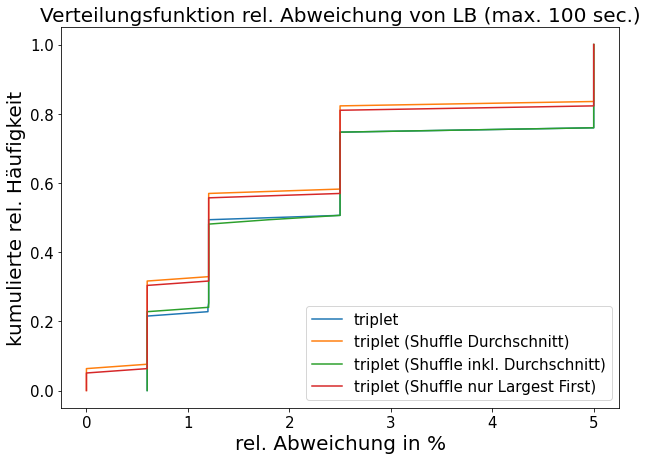

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_trip_StandardSEED123_200sec.csv'
df_4 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_t_shuffleAverage_100sec.csv'
df_5 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Average_Shuffle/results_zeitmessung_triplet_avginshuffleseed_250sec.csv'
df_6 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Largest_First/results_zeitmessung_triplet_LargestFirstSEED123_100sec.csv'
df_7 = pd.read_csv(url)
time = 100.01
df_4 = get_rel_abweichung(df_4,'triplet', time)
df_5 = get_rel_abweichung(df_5,'triplet', time)
df_6 = get_rel_abweichung(df_6,'triplet', time)
df_7 = get_rel_abweichung(df_7,'triplet', time)
dfs = [df_4,df_5,df_6, df_7]
labels = ['triplet',  'triplet (Shuffle Durchschnitt)', 'triplet (Shuffle inkl. Durchschnitt)','triplet (Shuffle nur Largest First)']
plt.figure(figsize=(10,7))
for i,df in enumerate(dfs):
  data = df['rel_Abweichung'].values
  data_sorted = np.sort(data)
  p = 1. * np.arange(len(data)) / (len(data) - 1)
  plt.plot(data_sorted, p, label=labels[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right",prop={'size': 15})
plt.xlabel('rel. Abweichung in %',fontsize=20)
plt.ylabel('kumulierte rel. Häufigkeit',fontsize=20)
#plt.title('Verteilungsfunktion rel. Abweichung von LB (max. ' + str(time) + ') sec', fontsize=20)
plt.title('Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)', fontsize=20)

## Anzahl Moves

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_unif_StandardFinalSEED123_200sec.csv'
#url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_hard_StandardFinalSEED123_200sec.csv'
#url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_triplet2_StandardFinalSEED123_200sec.csv'
df_typ = pd.read_csv(url)
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).max()
df_by_instance['sum_moves'] = df_by_instance['num_move22'] + df_by_instance['num_move21'] + df_by_instance['num_move11']
df_by_instance['rel22'] = df_by_instance['num_move22'] / df_by_instance['sum_moves']
df_by_instance['rel21'] = df_by_instance['num_move21'] / df_by_instance['sum_moves']
df_by_instance['rel11'] = df_by_instance['num_move11'] / df_by_instance['sum_moves']
df_by_instance.groupby('Anzahl_Items').mean()[['num_move22','num_move21','num_move11','rel22','rel21','rel11']]


,num_move22,num_move21,num_move11,rel22,rel21,rel11
Anzahl_Items,,,,,,
120,1708.4,166.05,2319.50,0.494329,0.050348,0.455323
250,4896.7,428.05,5397.95,0.510754,0.042812,0.446434
500,1989.4,182.80,2130.10,0.487407,0.044453,0.468139
1000,1434.8,130.20,1468.95,0.495223,0.045293,0.459485


Text(0, 0.5, 'relative Häufigkeit')

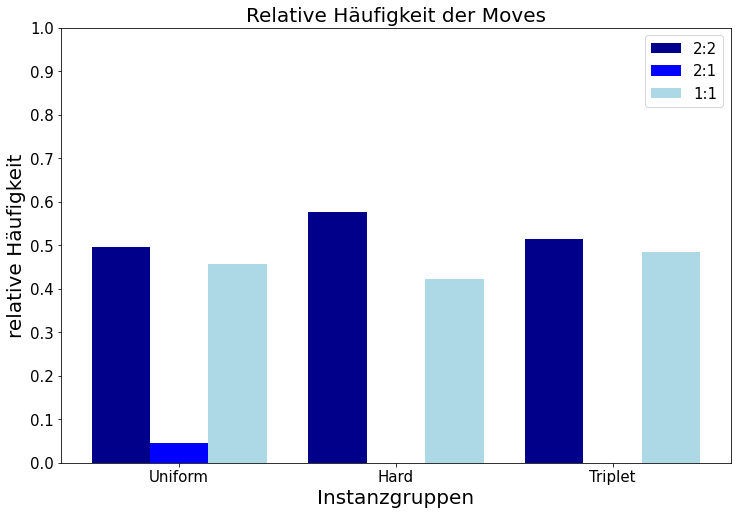

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ind = np.arange(3)  # the x locations for the groups
width = 0.27       # the width of the bars
rects1 = ax.bar(ind, [0.496928,0.577377,0.515108], width, color='darkblue')
rects2 = ax.bar(ind+width, [0.045726,0,0], width, color='blue')
rects3 = ax.bar(ind+width*2, [0.457345,0.422623,0.484892], width, color='lightblue')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Uniform', 'Hard', 'Triplet'))
ax.legend( (rects1[0], rects2[0], rects3[0]), ('2:2', '2:1', '1:1'),prop={'size': 15})
plt.title('Relative Häufigkeit der Moves', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,1.1,0.1),fontsize=15)
plt.xlabel('Instanzgruppen', fontsize=20)
plt.ylabel('relative Häufigkeit', fontsize=20)



### Verteilungsfunktion Uniform Triplet

Text(0.5, 1.0, 'Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)')

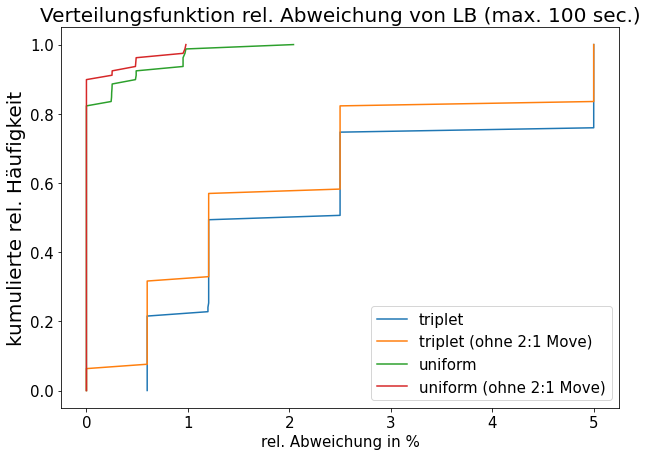

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_trip_StandardSEED123_200sec.csv'
df_1 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_trip_StandardOhne2%3A1SEED123_100sec.csv'
df_2 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df_3 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_unif_StandardOhne2%3A1SEED123_100sec.csv'
df_4 = pd.read_csv(url)
time = 100.01
df_1 = get_rel_abweichung(df_1,'triplet', time)
df_2 = get_rel_abweichung(df_2,'triplet', time)
df_3 = get_rel_abweichung(df_3,'uniform', time)
df_4 = get_rel_abweichung(df_4,'uniform', time)
dfs = [df_1,df_2,df_3, df_4]
labels = ['triplet',  'triplet (ohne 2:1 Move)', 'uniform','uniform (ohne 2:1 Move)']
plt.figure(figsize=(10,7))
for i,df in enumerate(dfs):
  data = df['rel_Abweichung'].values
  data_sorted = np.sort(data)
  p = 1. * np.arange(len(data)) / (len(data) - 1)
  plt.plot(data_sorted, p, label=labels[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right",prop={'size': 15})
plt.xlabel('rel. Abweichung in %',fontsize=15)
plt.ylabel('kumulierte rel. Häufigkeit',fontsize=20)
#plt.title('Verteilungsfunktion rel. Abweichung von LB (max. ' + str(time) + ') sec', fontsize=20)
plt.title('Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)', fontsize=20)

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_trip_StandardSEED123_200sec.csv'
df_1 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_trip_StandardOhne2%3A1SEED123_100sec.csv'
df_2 = pd.read_csv(url)

df_1 = df_1[df_1['Typ']=='triplet']
df_typ_sec = df_1[df_1['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).max()
print(df_by_instance.groupby('Anzahl_Items').mean().drop(['elapsed_time','HC','LB','Hit_LB','Bins_beyond_LB'], axis = 1))

print('ohne 2:1, aber Verzerrung bei 60er, da LB erreicht wird')
df_2 = df_2[df_2['Typ']=='triplet']
df_typ_sec = df_2[df_2['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).max()
print(df_by_instance.groupby('Anzahl_Items').mean().drop(['elapsed_time','HC','LB','Hit_LB','Bins_beyond_LB'], axis = 1))

              Bin_Kapazitaet  Iteration
Anzahl_Items                           
60                    1000.0    2443.95
120                   1000.0    1795.40
249                   1000.0    1581.30
501                   1000.0     919.15
ohne 2:1, aber Verzerrung bei 60er, da LB erreicht wird
              Bin_Kapazitaet  Iteration
Anzahl_Items                           
60                    1000.0    2167.15
120                   1000.0    2592.25
249                   1000.0    1963.75
501                   1000.0     986.35


## Permutation: Minimale Itemzahl

Text(0.5, 1.0, 'Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)')

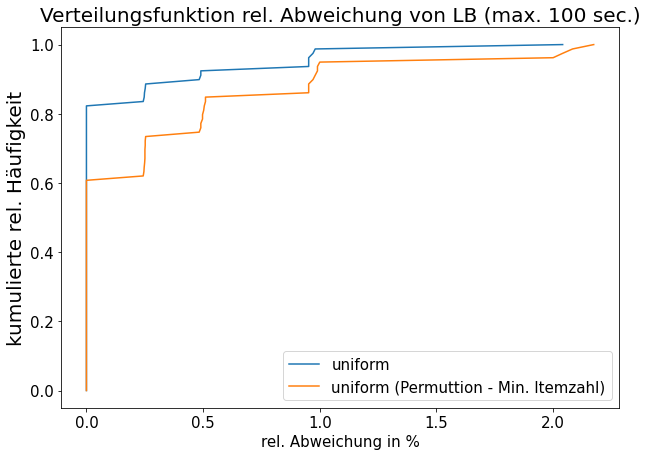

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Standardverfahren/results_zeitmessung_u_seed_100sec.csv'
df_3 = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Permutation/results_zeitmessung_unif_PBYHSEED123_100sec.csv'
df_4 = pd.read_csv(url)
time = 100.01
df_3 = get_rel_abweichung(df_3,'uniform', time)
df_4 = get_rel_abweichung(df_4,'uniform', time)
dfs = [df_3, df_4]
labels = ['uniform','uniform (Permuttion - Min. Itemzahl)']
plt.figure(figsize=(10,7))
for i,df in enumerate(dfs):
  data = df['rel_Abweichung'].values
  data_sorted = np.sort(data)
  p = 1. * np.arange(len(data)) / (len(data) - 1)
  plt.plot(data_sorted, p, label=labels[i])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right",prop={'size': 15})
plt.xlabel('rel. Abweichung in %',fontsize=15)
plt.ylabel('kumulierte rel. Häufigkeit',fontsize=20)
#plt.title('Verteilungsfunktion rel. Abweichung von LB (max. ' + str(time) + ') sec', fontsize=20)
plt.title('Verteilungsfunktion rel. Abweichung von LB (max. 100 sec.)', fontsize=20)

# _________________________________________________________

In [ ]:
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Permutation/results_zeitmessung_unif_PBYHSEED123_100sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
print('Permuation: Min Itemzahl Uniform')
print(df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','HC','elapsed_time','Hit_LB'], axis = 1))

url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_unif_StandardFinalSEED123_200sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='uniform']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
print('Uniform Reverse')
print(df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','HC','elapsed_time','Hit_LB','num_move22','num_move21','num_move11','constraint_checks'], axis = 1))
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_hard_StandardFinalSEED123_200sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='hard']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
print('Hard Reverse')
print(df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','HC','elapsed_time','Hit_LB','num_move22','num_move21','num_move11','constraint_checks'], axis = 1))
url = 'https://raw.githubusercontent.com/LukasSchmauch/bin_packing_problem/main/01_Ergebnisse_final/Move/results_zeitmessung_triplet2_StandardFinalSEED123_200sec.csv'
df = pd.read_csv(url)
df_typ = df[df['Typ']=='triplet']
df_typ_sec = df_typ[df_typ['elapsed_time']<100.01]
df_by_instance = df_typ_sec.groupby(['Instanzindex']).min()
print('Triplet Reverse: für 501er Zeit auf 200 setzen --> dann 1.1')
print(df_by_instance.groupby('Anzahl_Items').mean().drop(['Iteration','HC','elapsed_time','Hit_LB','num_move22','num_move21','num_move11','constraint_checks'], axis = 1))

Permuation: Min Itemzahl Uniform
              Bin_Kapazitaet      LB  Bins_beyond_LB
Anzahl_Items                                        
120                    150.0   49.05             0.2
250                    150.0  101.55             0.4
500                    150.0  201.20             0.4
1000                   150.0  400.55             0.6
Uniform Reverse
              Bin_Kapazitaet      LB  Bins_beyond_LB
Anzahl_Items                                        
120                    150.0   49.05            0.10
250                    150.0  101.55            0.25
500                    150.0  201.20            0.15
1000                   150.0  400.55            0.25
Hard Reverse
              Bin_Kapazitaet    LB  Bins_beyond_LB
Anzahl_Items                                      
200                 100000.0  55.5             0.8
Triplet Reverse: für 501er Zeit auf 200 setzen --> dann 1.1
              Bin_Kapazitaet     LB  Bins_beyond_LB
Anzahl_Items                         